# Assignemnt - 3

## NoSQL MongoDB

This assignemnt consists of data from a toy-store where in the obtained datasheet contains details regarding customer, product and it's sale. The tables are created and modulated as per requirement.

The auditing and normalization is done as to eleminate the redundancy and remove baisness in database.

This is done in similar process to previous assignment (Assignment #2 - Physical data model and normalization).

In [1]:
import numpy as np
import pandas as pd
import json
import os
import csv
from collections import OrderedDict
from io import StringIO
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from pymongo import MongoClient

In [2]:
# DB connectivity

client = MongoClient('localhost', 27017)
db = client.db
collection = db.collection

In [3]:
# Reading the data from the CSV file

with open('salesDataSample.csv') as f:
    data = f.read()

data = StringIO(data)
data = pd.read_csv(data)

# Creating and viewing master table/datasheet

data

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped       1         2     2003  ...   
1       5/7/2003 0:00   Shipped       2         5     2003  ...   
2       7/1/2003 0:00   Shipped       3         7     2003  ...   
3      8/25/2003 0:00   Shipped       3         8     2003  ...   
4     10/10/2003 0:00   Shipped       4        10     2003  ...   
...               ...       ...     ...       ...      ...  ...   
2818   12/2/2004 0:00   Shipped       4        12     2004  ...   
2819   1/31/2005 0:00   Shipped       1         1     2005  ...   
2820    3/1/2005 0:00  Resolved       1         3     2005  ...   
2821   3/28/2005 0:00   Shipped       1         3     2005  ...   
2822    5/6/2005 0:00   On Hold       2         5     2005  ...   

                       ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0           897 Long Airport Avenue           NaN            NYC    NY   
1                59 rue de l'Abbaye           NaN          Reims   NaN   
2     27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3                78934 Hillside Dr.           NaN       Pasadena    CA   
4                   7734 Strong St.           NaN  San Francisco    CA   
...                             ...           ...            ...   ...   
2818             C/ Moralzarzal, 86           NaN         Madrid   NaN   
2819                    Torikatu 38           NaN           Oulu   NaN   
2820             C/ Moralzarzal, 86           NaN         Madrid   NaN   
2821          1 rue Alsace-Lorraine           NaN       Toulouse   NaN   
2822             8616 Spinnaker Dr.           NaN         Boston    MA   

     POSTALCODE  COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0         10022      USA       NaN              Yu             Kwai    Small  
1         51100   France      EMEA         Henriot             Paul    Small  
2         75508   France      EMEA        Da Cunha           Daniel   Medium  
3         90003      USA       NaN           Young            Julie   Medium  
4           NaN      USA       NaN           Brown            Julie   Medium  
...         ...      ...       ...             ...              ...      ...  
2818      28034    Spain      EMEA          Freyre            Diego    Small  
2819      90110  Finland      EMEA       Koskitalo           Pirkko   Medium  
2820      28034    Spain      EMEA          Freyre            Diego   Medium  
2821      31000   France      EMEA          Roulet          Annette    Small  
2822      51003      USA       NaN         Yoshido             Juri   Medium  

[2823 rows x 25 columns]

## Entity Relationship Diagram (ERD)

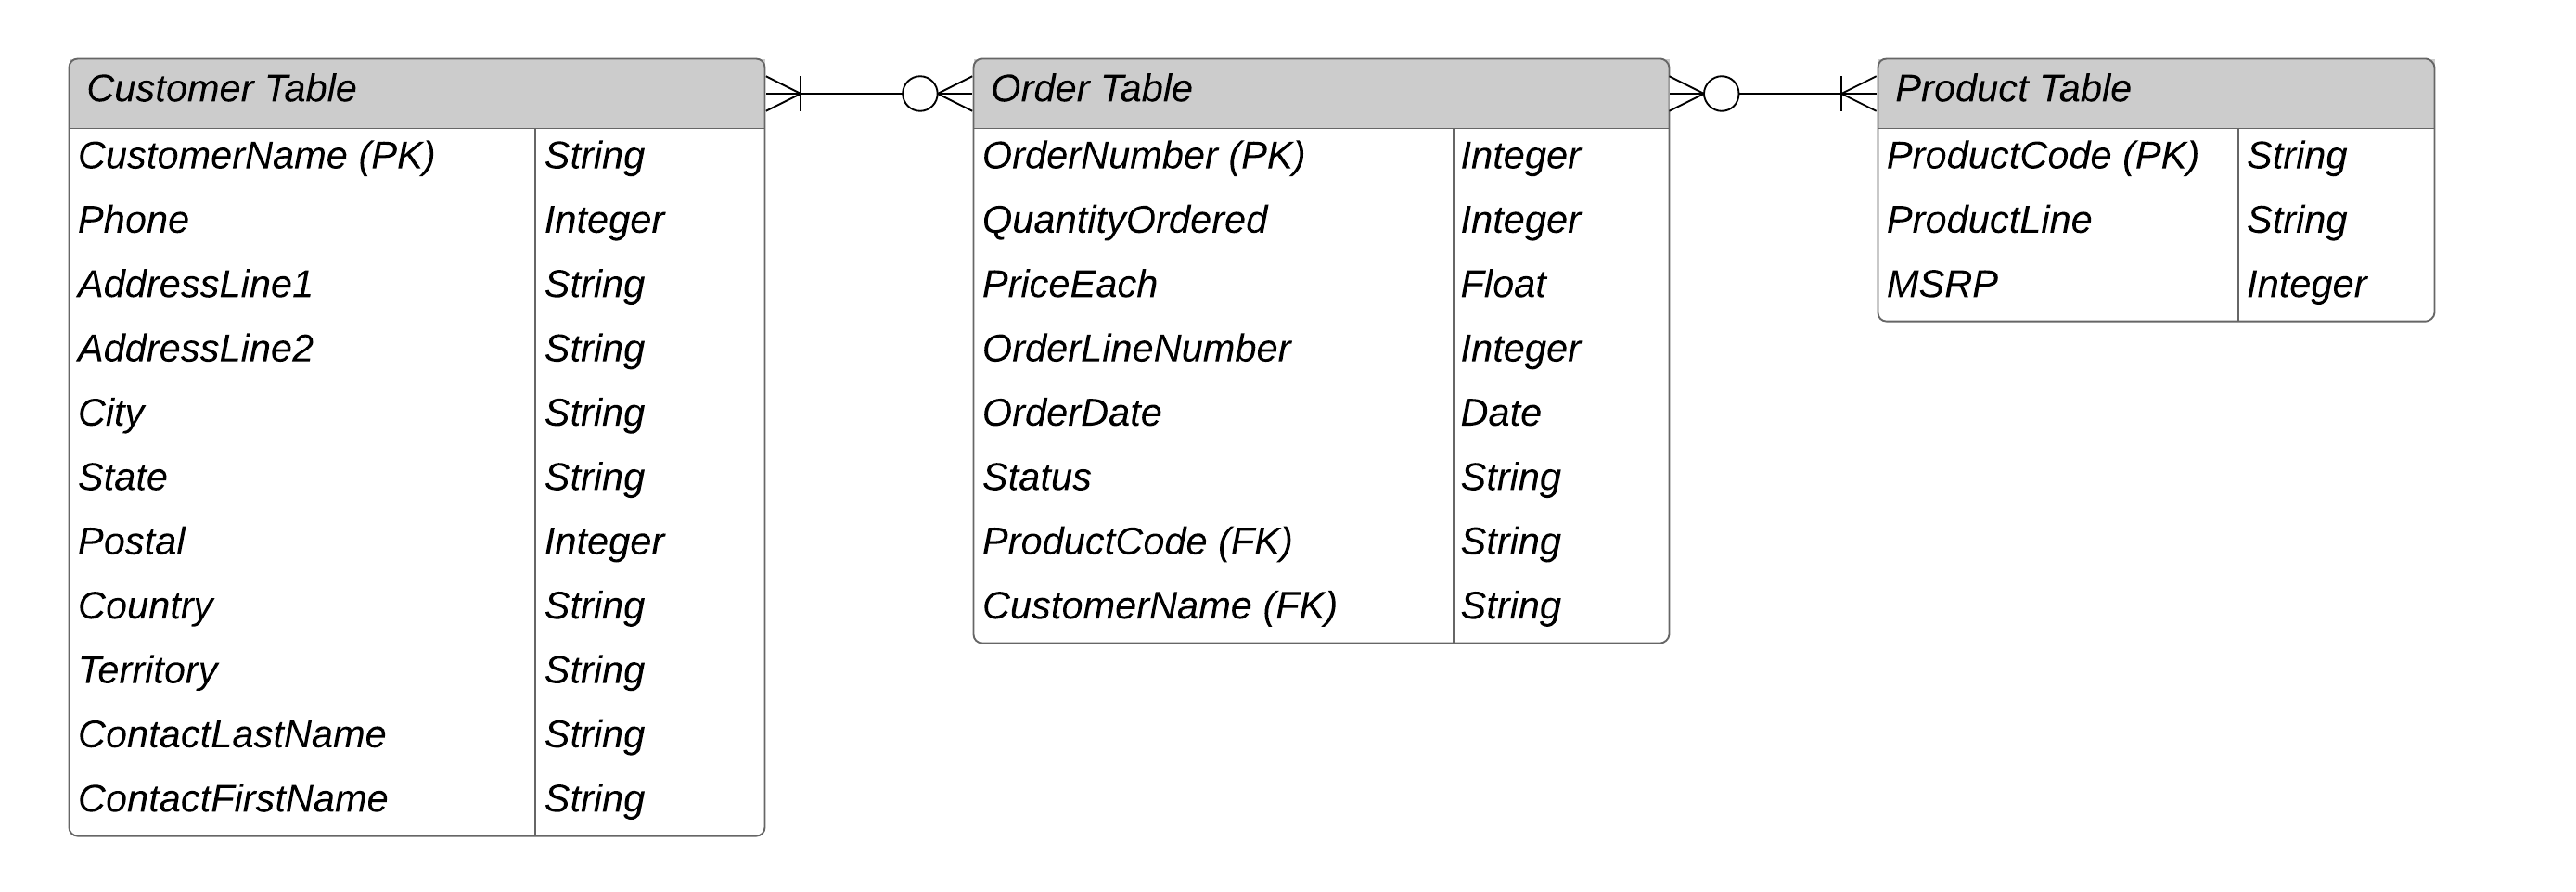

#### Creating Order table

Here the table is for order details which include the columns for 'ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'ORDERDATE', 'STATUS', 'PRODUCTCODE' 'CUSTOMERNAME'.

Here the Primary Key is 'ORDERNUMBER' which is unique to all orders. CUSTOMERNAME and PRODUCTCODE are the Foreign Keys in this table.

In [4]:
order_table = data.drop(columns=['PRODUCTLINE', 'MSRP', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'DEALSIZE'])
order_table_final = order_table.drop_duplicates()
order_table_final

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
0           10107               30      95.70                2   
1           10121               34      81.35                5   
2           10134               41      94.74                2   
3           10145               45      83.26                6   
4           10159               49     100.00               14   
...           ...              ...        ...              ...   
2818        10350               20     100.00               15   
2819        10373               29     100.00                1   
2820        10386               43     100.00                4   
2821        10397               34      62.24                1   
2822        10414               47      65.52                9   

            ORDERDATE    STATUS PRODUCTCODE              CUSTOMERNAME  
0      2/24/2003 0:00   Shipped    S10_1678         Land of Toys Inc.  
1       5/7/2003 0:00   Shipped    S10_1678        Reims Collectables  
2       7/1/2003 0:00   Shipped    S10_1678           Lyon Souveniers  
3      8/25/2003 0:00   Shipped    S10_1678         Toys4GrownUps.com  
4     10/10/2003 0:00   Shipped    S10_1678  Corporate Gift Ideas Co.  
...               ...       ...         ...                       ...  
2818   12/2/2004 0:00   Shipped    S72_3212     Euro Shopping Channel  
2819   1/31/2005 0:00   Shipped    S72_3212   Oulu Toy Supplies, Inc.  
2820    3/1/2005 0:00  Resolved    S72_3212     Euro Shopping Channel  
2821   3/28/2005 0:00   Shipped    S72_3212              Alpha Cognac  
2822    5/6/2005 0:00   On Hold    S72_3212         Gifts4AllAges.com  

[2823 rows x 8 columns]

In [5]:
# Auditing

order_table_final.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
ORDERDATE          0
STATUS             0
PRODUCTCODE        0
CUSTOMERNAME       0
dtype: int64

In [6]:
# Printing

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global order_table_final
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    order_table_final.to_csv (export_file_path, index=False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()

# Named the exported file as -> orderTableFinal.csv & exit the window to proceed further with the application

#### Creating Customer table

Here the table is for customer details which include the columns for 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'.

Here the Primary Key for the table is 'CUSTOMERNAME'.
No Foreign Key exists here.

In [7]:
customer_table = data.drop(columns=['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTCODE', 'PRODUCTLINE', 'MSRP', 'DEALSIZE'])
customer_table_final = customer_table.drop_duplicates()
customer_table_final = customer_table_final.drop(columns = ['ADDRESSLINE2', 'STATE', 'TERRITORY'])
customer_table_final

CUSTOMERNAME              PHONE  \
0                     Land of Toys Inc.         2125557818   
1                    Reims Collectables         26.47.1555   
2                       Lyon Souveniers   +33 1 46 62 7555   
3                     Toys4GrownUps.com         6265557265   
4              Corporate Gift Ideas Co.         6505551386   
..                                  ...                ...   
483        Australian Collectables, Ltd     61-9-3844-6555   
554                    Gift Ideas Corp.         2035554407   
567  Bavarian Collectables Imports, Co.  +49 89 61 08 9555   
571                        Royale Belge   (071) 23 67 2555   
937             Auto-Moto Classics Inc.         6175558428   

                      ADDRESSLINE1           CITY POSTALCODE    COUNTRY  \
0          897 Long Airport Avenue            NYC      10022        USA   
1               59 rue de l'Abbaye          Reims      51100     France   
2    27 rue du Colonel Pierre Avia          Paris      75508     France   
3               78934 Hillside Dr.       Pasadena      90003        USA   
4                  7734 Strong St.  San Francisco        NaN        USA   
..                             ...            ...        ...        ...   
483                 7 Allen Street   Glen Waverly       3150  Australia   
554               2440 Pompton St.       Glendale      97561        USA   
567                   Hansastr. 15         Munich      80686    Germany   
571           Boulevard Tirou, 255      Charleroi     B-6000    Belgium   
937              16780 Pompton St.     Brickhaven      58339        USA   

    CONTACTLASTNAME CONTACTFIRSTNAME  
0                Yu             Kwai  
1           Henriot             Paul  
2          Da Cunha           Daniel  
3             Young            Julie  
4             Brown            Julie  
..              ...              ...  
483         Connery             Sean  
554           Lewis              Dan  
567     Donnermeyer          Michael  
571        Cartrain          Pascale  
937          Taylor           Leslie  

[92 rows x 8 columns]

In [8]:
#Auditing

customer_table_final.isnull().sum()

CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
POSTALCODE          3
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
dtype: int64

In [9]:
# Printing

root= tk.Tk()

canvas2 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas2.pack()

def exportCSV ():
    global customer_table_final
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    customer_table_final.to_csv (export_file_path, index=False, header=False)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas2.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()

# Named the exported file as -> customerTableFinal.csv & exit the window to proceed further with the application

#### Creating Product table

Here the table is for product details which include the columns for 'PRODUCTCODE', 'PRODUCTLINE', 'MSRP'.

Here, 'PRODUCTCODE' acts as the table's Primary Key.
No Foreign Key is present or necessary in the table.

In [10]:
product_table = data.drop(columns=['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'])
product_table_final = product_table.drop_duplicates()
product_table_final

PRODUCTLINE  MSRP PRODUCTCODE
0      Motorcycles    95    S10_1678
26    Classic Cars   214    S10_1949
54     Motorcycles   118    S10_2016
80     Motorcycles   193    S10_4698
106   Classic Cars   136    S10_4757
...            ...   ...         ...
2691         Ships   100   S700_3505
2717         Ships    99   S700_3962
2743        Planes    74   S700_4002
2770        Planes    49    S72_1253
2797         Ships    54    S72_3212

[109 rows x 3 columns]

In [11]:
#Auditing

product_table_final.isnull().sum()

PRODUCTLINE    0
MSRP           0
PRODUCTCODE    0
dtype: int64

In [12]:
# Printing

root= tk.Tk()

canvas3 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas3.pack()

def exportCSV ():
    global product_table_final
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    product_table_final.to_csv (export_file_path, index=False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas3.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()

# Named the exported file as -> productTableFinal.csv & exit the window to proceed further with the application

#### Creating JSON file

In [13]:
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

label1 = tk.Label(root, text='File Conversion Tool', bg = 'lightsteelblue2')
label1.config(font=('helvetica', 20))
canvas1.create_window(150, 60, window=label1)

def getCSV ():
    global read_file
    
    import_file_path = filedialog.askopenfilename()
    read_file = pd.read_csv (import_file_path)
    
browseButton_CSV = tk.Button(text="      Import CSV File     ", command=getCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 130, window=browseButton_CSV)

def convertToJSON ():
    global read_file
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.json')
    read_file.to_json (export_file_path)

saveAsButton_JSON = tk.Button(text='Convert CSV to JSON', command=convertToJSON, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 180, window=saveAsButton_JSON)

def exitApplication():
    MsgBox = tk.messagebox.askquestion ('Exit Application','Are you sure you want to exit the application',icon = 'warning')
    if MsgBox == 'yes':
       root.destroy()
     
exitButton = tk.Button (root, text='       Exit Application     ',command=exitApplication, bg='brown', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 230, window=exitButton)

root.mainloop()

After exporting each of the JSON file they can be further imported into MongoDB server/Database where more data processing and modulation actions can be performed.

### Web-scraped data

This data is web-scrapped from the gameing forum platform 'pathofstats' for the game 'Path of Exile League'.


In [14]:
# Reading Data

data_frame = pd.read_csv('poeStats.csv')
data_frame = data_frame.drop(columns=['dead', 'online'])


# Printing/Output data modulated
# Please un-comment the code line to generate csv file for the same

# data_frame.to_csv(r'poeStatsMod.csv', index = False)


# Showcasing data

data_frame

rank                    name  level        class  \
0          1      Tzn_NecroIsFineNow    100  Necromancer   
1          1        RaizNeverFirstQT    100  Necromancer   
2          1  GucciStreamerAdvantage    100  Necromancer   
3          1             ChiroxPrime    100       Slayer   
4          2     Cool_NecroIsFineNow    100      Deadeye   
...      ...                     ...    ...          ...   
59771  14999       ПроклятьеРекласта     89  Necromancer   
59772  15000       IshibashiSummoner     94  Necromancer   
59773  15000                 BLively     73       Slayer   
59774  15000                vawddvaw     89    Gladiator   
59775  15000                 Reselin     53  Necromancer   

                                                      id  experience  \
0      3dcddd59f5088893f734f39686350990dae168cc4f4b00...  4250334444   
1      8f3216db5ac9106c287a834731aafc83c387138f28fc45...  4250334444   
2      c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...  4250334444   
3      c861372da792be0b22c45bf437ccd58437c52e9455e0bf...  4250334444   
4      24ae924ceed7989ef3d3d6772612832bb467a6094352c7...  4250334444   
...                                                  ...         ...   
59771  d33b4f6e08c10e365765f9a36a8f36d561fd1d86f10ee1...  1786695653   
59772  5764cfa387e0a87a4bebc1a3c5017e92de8bbb06445c47...  2720770853   
59773  9ac75ab75a47cee8a9dfb0a31912df8909720a8b20f9f1...   495034029   
59774  cf02dfc0c90b2df9c7ac76bbedd91e93c2a8a2ca629c15...  1786638972   
59775  f7ffda5ca2490546344d32930693f8299930ce9451df4a...    77909816   

            account  challenges        twitch              ladder  
0            TheTzn          40        thetzn           Harbinger  
1            RaizQT          22        raizqt    SSF Harbinger HC  
2       GucciPradas          35   guccipradas  Hardcore Harbinger  
3          Chiroxun          26           NaN       SSF Harbinger  
4          cooltail          22           NaN           Harbinger  
...             ...         ...           ...                 ...  
59771  Romanchik002          18  romanchik002  Hardcore Harbinger  
59772  Ishibashisan          33           NaN           Harbinger  
59773        ruby01          19           NaN       SSF Harbinger  
59774        Lecarn          24        lecarn  Hardcore Harbinger  
59775      woworpoe          19           NaN    SSF Harbinger HC  

[59776 rows x 10 columns]

The data can also provide answers to the Questions like

##### What are tags are associated with a person, place or thing?

Tags associated with the users/gamers are

In [15]:
data = pd.read_csv('poeStats_tagsAssociatedClass.csv')
data

class
0    Necromancer
1         Slayer
2        Deadeye
3      Gladiator
4     Inquisitor
5         Raider
6       Champion
7      Occultist
8     Pathfinder
9   Elementalist
10     Chieftain
11    Hierophant
12     Ascendant
13     Trickster
14      Guardian
15     Berserker
16    Juggernaut
17      Saboteur
18      Assassin
19         Witch
20      Marauder
21        Ranger
22         Scion
23       Duelist
24        Shadow
25       Templar

In [16]:
data = pd.read_csv('poeStats_tagsAssociatedLadder.csv')
data

ladder
0           Harbinger
1    SSF Harbinger HC
2  Hardcore Harbinger
3       SSF Harbinger

##### What users are like other users?

In [17]:
data = pd.read_csv('poeStats_classNecromancer.csv')
data

account
0         TheTzn
1         RaizQT
2    GucciPradas
3       rami1337
4        Pochtli
..           ...
995    zhexek222
996  ScrollThief
997       Mataha
998    Clumsy313
999     Rigget86

[1000 rows x 1 columns]

In [18]:
data = pd.read_csv('poeStats_classSlayer.csv')
data

account
0        Chiroxun
1        shirusen
2         Kanelol
3            Exif
4            Tsar
..            ...
995        mosobo
996       vvillow
997       BazouHC
998     propirate
999  Renegade0010

[1000 rows x 1 columns]

In [19]:
data = pd.read_csv('poeStats_classDeadeye.csv')
data

account
0     cooltail
1    Steelmage
2        celdo
3          mpn
4      YoshiXt
..         ...
714     Ramsoe
715  sarodikus
716   Brandaum
717    Aivua9M
718    insinho

[719 rows x 1 columns]

## Solutions

#### What are tags are associated with a person, place or thing?

Tags associated with Customer(people) : Name, Phonem Address, Location, Point of Contact


Tags associated with Product(thing) : Code, Line, MSRP


Tags associated with Order(Relation) : OrderNumber, Quantity, Price, Date, Status, OrderLineNumber, ProductCode, CustomerName

#### What social media users are like other social media users in your domain?

In the sales domain, there are customers who would place orders of similar kind.

Here "Euro Shopping Channel" and "Mini Gifts Distribution Ltd." are similar kind as they are interested in the same product "Classic Cars" and "Vintage Cars" and have placed orders accordingly.

On similar grounds, "Euro Shopping Channel" and "Rovelli Gifts" would be interested in a common product "Planes". "Rovelli Gifts" would not be similar to "Mini Gifts Distribution Ltd." as they have no such common product between them.

This comparision is done on the basis of all time data, i.e. From start to end of data logs.

The data for the same can be found in "similarCustomer.csv".

#### What people, places or things are popular in your domain?

Products popular in the given sales domain are :
1. Classic Cars
2. Vintage Cars
3. Motorcycles
4. Planes
5. Trucks and Buses
6. Ships
7. Trains

In [20]:
all_time_popular = pd.read_csv('popularityAllTime.csv')
all_time_popular

PRODUCTCODE              Line  COUNT(*)
0    S10_1949      Classic Cars       967
1    S18_1342      Vintage Cars       607
2    S10_1678       Motorcycles       331
3    S18_1662            Planes       306
4    S12_1666  Trucks and Buses       301
5    S18_3029             Ships       234
6    S18_3259            Trains        77

#### What people, places or things are trending in your domain? (A trend is popularity over time.)

Products popular in year 2003 for the given sales domain are :

1. Classic Cars
2. Vintage Cars
3. Trucks and Buses
4. Motorcycles
5. Planes
6. Ships
7. Trains

In [21]:
popularity_yr2003 = pd.read_csv('popularityYr2003.csv')
popularity_yr2003

PRODUCTCODE              Line  COUNT(*)
0    S10_1949      Classic Cars       366
1    S18_1342      Vintage Cars       221
2    S12_1666  Trucks and Buses       110
3    S10_1678       Motorcycles       109
4    S18_1662            Planes        85
5    S18_3029             Ships        81
6    S18_3259            Trains        28

Products popular in year 2004 for the given sales domain are :

1. Classic Cars
2. Vintage Cars
3. Motorcycles
4. Planes
5. Trucks and Buses
6. Ships
7. Trains

In [22]:
popularity_yr2004 = pd.read_csv('popularityYr2004.csv')
popularity_yr2004

PRODUCTCODE              Line  COUNT(*)
0    S10_1949      Classic Cars       442
1    S18_1342      Vintage Cars       284
2    S10_1678       Motorcycles       164
3    S18_1662            Planes       161
4    S12_1666  Trucks and Buses       142
5    S18_3029             Ships       115
6    S18_3259            Trains        37

Products popular in year 2005 for the given sales domain are :

1. Classic Cars
2. Vintage Cars
3. Planes
4. Motorcycles
5. Trucks and Buses
6. Ships
7. Trains

In [23]:
popularity_yr2005 = pd.read_csv('popularityYr2005.csv')
popularity_yr2005

PRODUCTCODE              Line  COUNT(*)
0    S10_1949      Classic Cars       159
1    S18_1342      Vintage Cars       102
2    S18_1662            Planes        60
3    S10_1678       Motorcycles        58
4    S12_1666  Trucks and Buses        49
5    S18_3029             Ships        38
6    S18_3259            Trains        12

#### Description of the design choices you made in converting your SQL Schema that makes sense.

No such alterations were made to fit the data from SQL database to NoSQL database structure.
Whereas, in NoSQL database structure, the whole raw data (partial and biased) data could be fit into it's document and would not present an issue with consistency, but after normalizing the data for SQL data structures, there is no need for any such modifications to be made to fit the given SQL structure to the documented structure.

As the tables are normalized and split into it's sub-tabular structures, this lightens the load on a single document database as if the count of data increases in large, the whole document needs to be loaded to find a given data and takes a lots of time to process the same. Therefore, these relational database structure are helpful to be in for letting the database get converted from SQL to NoSQL.

## Report

#### AUDIT VALIDITY/ACCURACY

The dataset above has been audited and has the least possible null values.

#### Assignemnt details

This assignment is to convert SQL formated database to NoSQL formated database. Here the .csv files are SQL formated database for the sales data, portable to mySQL and .json files are NoSQL formated database to be portable to MongoDB.

The files used here are - 'sales_data_sample2.csv'

In this document, the file is read and all table details are extracted.
After extraction, the Conceptual Model is designed based on this table and an Entity Relationship Diagram is presented to follow the table data.
With regards to the conceptual model, other tables are created.
They are processed to be in their Normalized forms (1NF, 2NF and 3NF).
If there is a large number of null-valued cells in this table, the columns are dropped in that accordance.
After the audit, the table is verified if that matches the created conceptual model.

After the tables are created, they are exported to their .csv files labled as "orderTableFinal.csv", "customerTableFinal.csv" and "productTableFinal.csv" along with their headers.
They are further processed in mySQL for data extraction. (Code snippets can be found in "sqlCodeSnippets.txt")

This is repeated for all the tables to be created and data extracted from the originally obtained file.

After all of the files are created, they are converted into their .json file formats which contin documented data structures to accomodate all the said tabular data into it.
These files can be imported into MongoDB with the command of
 "> mongoimport --host <host_name> --username <user_name> --password <password> --db <database_name> --collection <collection_name> --file <input_file>"
Where, 
    1. --host is an optional parameter that specifies the remote server Mongo database instance
    2. --username and --password are the optional parameters that specify the authentication details of a user
    3. --db specifies the database name
    4. --collection specifies the collection name
    5. --file specifies the path of the input file. If this is not specified, the standard input (i.e. stdin) is used
    
The Questions asked in the assignment are solved and mentioned under the "Solution" heading.
    

*NF here indicates Normal Form

## Conclusion

The SQL formated database has successfully been converted to it's counterpart, NoSQL formated database.
These are stored in their .csv and .json file extentions respectively.

## Contribution

Majority of the application writing is self written.
Referenced with Tkinter for UI and pop-up window design.  

## CITATIONS

https://datatofish.com/

## License

Copyright 2020 Shreyash Suratwala

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.